<a href="https://colab.research.google.com/github/MasayaUmezaki/survey/blob/main/text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**アクセス許可**

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**CSVの読み込み**

In [26]:
import pandas as pd
survey = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/survey.csv')
print(len(survey))
survey.head()

86


,datetime,comment,satisfaction
0,2024/3/11,駅前に若者が集まっている(AA駅),1
1,2024/2/25,スポーツできる場所があるのが良い,5
2,2024/2/18,子育て支援が嬉しい,5
3,2024/4/9,保育園に入れる（待機児童なし）,4
4,2024/1/6,駅前商店街が寂しい,2


**欠損値の確認**

In [27]:
survey.isna().sum()

,0
datetime,0
comment,2
satisfaction,0


**欠損地の除去**

In [28]:
survey = survey.dropna()
survey.isna().sum()

,0
datetime,0
comment,0
satisfaction,0


**コメントからAAを除去**

In [29]:
survey["comment"] = survey["comment"].str.replace("AA","")
survey["comment"].head()

,comment
0,駅前に若者が集まっている(駅)
1,スポーツできる場所があるのが良い
2,子育て支援が嬉しい
3,保育園に入れる（待機児童なし）
4,駅前商店街が寂しい


**コメントから()の文字を除去**

In [30]:
survey["comment"] = survey["comment"].str.replace("\(.+?\)","", regex=True)
survey.head()

,datetime,comment,satisfaction
0,2024/3/11,駅前に若者が集まっている,1
1,2024/2/25,スポーツできる場所があるのが良い,5
2,2024/2/18,子育て支援が嬉しい,5
3,2024/4/9,保育園に入れる（待機児童なし）,4
4,2024/1/6,駅前商店街が寂しい,2


**コメントから（）の文字を除去**

In [31]:
survey["comment"] = survey["comment"].str.replace("\（.+?\）","", regex=True)
survey.head()

,datetime,comment,satisfaction
0,2024/3/11,駅前に若者が集まっている,1
1,2024/2/25,スポーツできる場所があるのが良い,5
2,2024/2/18,子育て支援が嬉しい,5
3,2024/4/9,保育園に入れる,4
4,2024/1/6,駅前商店街が寂しい,2


**コメントの長さ**

In [32]:
survey["length"] = survey["comment"].str.len()
survey.head()

,datetime,comment,satisfaction,length
0,2024/3/11,駅前に若者が集まっている,1,12
1,2024/2/25,スポーツできる場所があるのが良い,5,16
2,2024/2/18,子育て支援が嬉しい,5,9
3,2024/4/9,保育園に入れる,4,7
4,2024/1/6,駅前商店街が寂しい,2,9


**コメントの長さのヒストグラム**

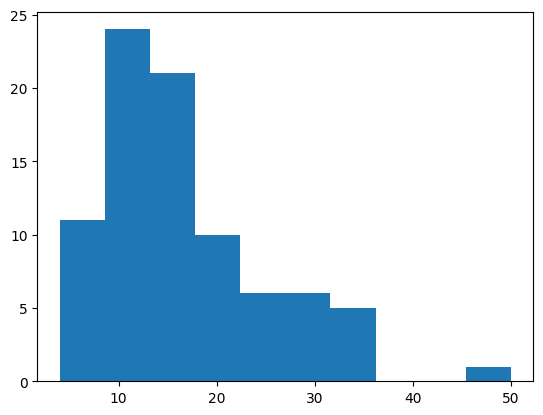

In [33]:
import matplotlib.pyplot as plt
plt.hist(survey["length"])
plt.show()

**mecabをインストール**

In [34]:
! pip install mecab-python3 unidic-lite

**文章を分割**

In [35]:
import MeCab
tagger = MeCab.Tagger()
text = "すもももももももものうちです。"
words = tagger.parse(text)
print(words)

すもも	スモモ	スモモ	李	名詞-普通名詞-一般			0
も	モ	モ	も	助詞-係助詞			
もも	モモ	モモ	桃	名詞-普通名詞-一般			0
も	モ	モ	も	助詞-係助詞			
もも	モモ	モモ	桃	名詞-普通名詞-一般			0
の	ノ	ノ	の	助詞-格助詞			
うち	ウチ	ウチ	内	名詞-普通名詞-副詞可能			0
です	デス	デス	です	助動詞	助動詞-デス	終止形-一般	
。			。	補助記号-句点			
EOS



**文章から単語を抽出**

In [36]:
words = tagger.parse(text).splitlines()
words_arr = []
for i in words:
  if i == "EOS" : continue
  word_tmp = i.split()[0]
  words_arr.append(word_tmp)
words_arr

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち', 'です', '。']

**文章から名詞を抽出**

In [37]:
nouns = []
text = "すもももももももものうちです。"
words = tagger.parse(text)
tagger = MeCab.Tagger()
for i in words.splitlines():
  if i == "EOS" : continue
  if "名詞" in i:
    word_tmp = i.split()[0]
    nouns.append(word_tmp)
nouns

['すもも', 'もも', 'もも', 'うち']

**CSVのコメントから名詞を抽出**

In [38]:
import pandas as pd
import MeCab

# CSVファイルの指定（適宜変更）
csv_file = "/content/drive/MyDrive/Colab Notebooks/survey.csv"  # CSVファイル名
column_name = "comment"    # 解析したい列名

# CSVの読み込み
df = pd.read_csv(csv_file)

# MeCabの初期化
tagger = MeCab.Tagger()

# 名詞を格納するリスト
all_nouns = []

# 指定した列のテキストを形態素解析
for text in df[column_name].dropna():  # NaN（欠損値）を除外
    text = str(text)  # 念のため文字列に変換
    node = tagger.parseToNode(text)

    while node:
        features = node.feature.split(",")
        if features[0] == "名詞":  # 名詞のみを抽出
            all_nouns.append(node.surface)
        node = node.next

# 名詞を表示
print(all_nouns)


['駅前', '若者', 'AA', '駅', 'スポーツ', '場所', '子育て', '支援', '保育', '待機', '児童', 'なし', '駅前', '商店', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '学校', '公園', '近く', '公園', 'スーパー', '子育て', 'デート', 'スポット', '商店', '夜道', 'BB', '地区', 'ゴミ', '処理', '楽', '映画', '街路', '公園', '追加', '観光', 'スポット', '子育て', '道', '都内', 'アクセス', '家賃', 'BBB', '渋滞', '商店', '屋根', '雨', '商店', '喫茶', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転', 'ランニング', '運動', '場所', '企業', '駅前', '駐車', '変', 'おじ', '声', '事', '警察', '巡回', '強化', '消防', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', '氾濫', '防止', '説明', '信号', '交差', '点', 'ｘｘｘ', '事故', '信号', '商店', '活性', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪', '不便', '街路', '落ち葉', '掃除', '街路', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治', '体', '支援', '自治', '体', '活動', '安心', '観光', '地', '最近', '他県', 'ナンバー', '車', '防犯', '駐車', '数', '料金', '駅前', '公共', '駐車', '歩行', '信号', '老人', '子供', '事', '設定', '急行', '都内', 'バス', '路線', '春', '桜', '並木', '最高', '桜', '並木', '隣町', 'ごみ', '処理',

**名詞の頻出回数**

In [39]:
import pandas as pd
import MeCab
from collections import Counter

# CSVファイルの読み込み
csv_file = "/content/drive/MyDrive/Colab Notebooks/survey.csv"  # ← ファイル名を適宜変更
column_name = "comment"    # ← 解析したい列名を指定

# CSVの読み込み
df = pd.read_csv(csv_file)

# MeCabの初期化
mecab = MeCab.Tagger()

# 名詞のカウント用リスト
noun_counter = Counter()

# 指定した列のテキストを形態素解析
for text in df[column_name].dropna():  # NaN（欠損値）を除外
    text = str(text)  # 念のため文字列に変換
    node = mecab.parseToNode(text)

    while node:
        features = node.feature.split(",")
        if features[0] == "名詞":  # 名詞のみを対象
            noun_counter[node.surface] += 1
        node = node.next

# 出現頻度の高い上位20件を表示
print(noun_counter.most_common(20))
print("\n")

# 出現頻度の高い上位20件を整形して表示
print("words count")
for word, count in noun_counter.most_common(20):
    print(f"{word} {count}")

[('駅前', 7), ('場所', 6), ('商店', 5), ('公園', 5), ('役所', 5), ('駐車', 4), ('対応', 4), ('スポーツ', 3), ('子育て', 3), ('支援', 3), ('施設', 3), ('街路', 3), ('道', 3), ('安心', 3), ('災害', 3), ('時', 3), ('信号', 3), ('病院', 2), ('学校', 2), ('スポット', 2)]


words count
駅前 7
場所 6
商店 5
公園 5
役所 5
駐車 4
対応 4
スポーツ 3
子育て 3
支援 3
施設 3
街路 3
道 3
安心 3
災害 3
時 3
信号 3
病院 2
学校 2
スポット 2


**顧客満足度と名詞の相関**

In [40]:
import pandas as pd
import MeCab
from collections import Counter

# CSVファイルの指定（適宜変更）
csv_file = "/content/drive/MyDrive/Colab Notebooks/survey.csv"  # CSVファイル名
comment_col = "comment"  # コメント列
satisfaction_col = "satisfaction"  # 満足度列

# CSVの読み込み
df = pd.read_csv(csv_file)

# MeCabの初期化
mecab = MeCab.Tagger()

# 名詞のカウント & 各名詞の満足度リスト
noun_counter = Counter()
noun_satisfaction = {}

# 指定した列のテキストを形態素解析
for index, row in df.dropna(subset=[comment_col, satisfaction_col]).iterrows():  # NaNを除外
    text = str(row[comment_col])  # コメント列
    satisfaction = row[satisfaction_col]  # 満足度列

    node = mecab.parseToNode(text)
    seen_nouns = set()  # 一つのコメントで同じ単語を重複カウントしないように

    while node:
        features = node.feature.split(",")
        if features[0] == "名詞":  # 名詞のみを対象
            noun = node.surface
            noun_counter[noun] += 1
            if noun not in seen_nouns:
                seen_nouns.add(noun)
                if noun not in noun_satisfaction:
                    noun_satisfaction[noun] = []
                noun_satisfaction[noun].append(satisfaction)
        node = node.next

# 各名詞の満足度平均を算出
noun_avg_satisfaction = {
    noun: sum(scores) / len(scores) for noun, scores in noun_satisfaction.items()
}

# 出現頻度の高い上位10名詞を取得
top_nouns = noun_counter.most_common(10)

# 結果をDataFrame化
df_result = pd.DataFrame(
    [(noun, count, noun_avg_satisfaction[noun]) for noun, count in top_nouns],
    columns=["words", "count", "average_satisfaction"]
)

# 結果を表示
print(df_result)

# CSVに保存（オプション）
df_result.to_csv("noun_satisfaction_analysis.csv", index=False)


  words  count  average_satisfaction
0    駅前      7              1.428571
1    場所      6              3.000000
2    商店      5              2.200000
3    公園      5              2.200000
4    役所      5              3.000000
5    駐車      4              1.000000
6    対応      4              2.000000
7  スポーツ      3              3.666667
8   子育て      3              4.333333
9    支援      3              3.000000


**駅前と同時に使用されている名詞を抽出する**

In [41]:
import pandas as pd
import MeCab
from collections import Counter

# CSVファイルの指定（適宜変更）
csv_file = "/content/drive/MyDrive/Colab Notebooks/survey.csv"  # CSVファイル名
comment_col = "comment"  # コメント列

# フラグを立てる対象の名詞
target_words = {"駅前"}

# CSVの読み込み
df = pd.read_csv(csv_file)

# MeCabの初期化
mecab = MeCab.Tagger()

# フラグ列を追加（「駅前」を含む場合1、それ以外0）
def check_flag(text):
    node = mecab.parseToNode(str(text))
    while node:
        if node.surface in target_words:
            return 1
        node = node.next
    return 0

df["flag"] = df[comment_col].dropna().apply(check_flag)

# フラグが立っているコメントのみ抽出
df_flagged = df[df["flag"] == 1]

# 名詞のカウント用リスト
noun_counter = Counter()

# フラグが立ったコメントの名詞を抽出
for text in df_flagged[comment_col].dropna():
    node = mecab.parseToNode(str(text))
    while node:
        features = node.feature.split(",")
        if features[0] == "名詞":  # 名詞のみを対象
            noun_counter[node.surface] += 1
        node = node.next

# 出現頻度の高い上位10件を表示
print("words count")
for word, count in noun_counter.most_common(10):
    print(f"{word} {count}")

# 結果をCSVに保存（オプション）
df_result = pd.DataFrame(noun_counter.most_common(), columns=["words", "count"])
df_result.to_csv("flagged_noun_frequency.csv", index=False)


words count
駅前 7
駐車 4
不便 2
若者 1
AA 1
駅 1
商店 1
駐輪 1
数 1
料金 1


**TF-IDF + コサイン類似度 を用いたコメントの類似度**

In [42]:
import pandas as pd
import MeCab
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# CSVファイルの指定（適宜変更）
csv_file = "/content/drive/MyDrive/Colab Notebooks/survey.csv"  # CSVファイル名
comment_col = "comment"  # コメント列

# CSVの読み込み
df = pd.read_csv(csv_file)

# MeCabの初期化（形態素解析）
mecab = MeCab.Tagger()

# 形態素解析して名詞・動詞・形容詞のみを抽出
def tokenize(text):
    node = mecab.parseToNode(str(text))
    words = []
    while node:
        features = node.feature.split(",")
        if features[0] in ["名詞", "動詞", "形容詞"]:  # 重要な品詞のみ
            words.append(node.surface)
        node = node.next
    return " ".join(words)

# `comment` 列のテキストを形態素解析し、単語リスト化
df["tokenized_comment"] = df[comment_col].dropna().apply(tokenize)

# NaN を空文字 "" に置き換え
df["tokenized_comment"] = df["tokenized_comment"].fillna("")

# TF-IDF ベクトル化
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["tokenized_comment"])

# コサイン類似度を計算
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# 結果をDataFrameに変換
df_similarity = pd.DataFrame(cosine_sim, index=df.index, columns=df.index)

# 出力（コメントIDごとの類似度マトリクス）
print(df_similarity)

# 類似度データをCSVに保存（オプション）
df_similarity.to_csv("comment_similarity.csv")


          0         1    2    3         4         5         6    7         8   \
0   1.000000  0.000000  0.0  0.0  0.173719  0.000000  0.000000  0.0  0.164389   
1   0.000000  1.000000  0.0  0.0  0.000000  0.157041  0.227564  0.0  0.000000   
2   0.000000  0.000000  1.0  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
3   0.000000  0.000000  0.0  1.0  0.000000  0.000000  0.000000  0.0  0.000000   
4   0.173719  0.000000  0.0  0.0  1.000000  0.000000  0.000000  0.0  0.000000   
..       ...       ...  ...  ...       ...       ...       ...  ...       ...   
81  0.000000  0.166887  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
82  0.000000  0.158699  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
83  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
84  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
85  0.152379  0.000000  0.0  0.0  0.210681  0.000000  0.000000  0.0  0.000000   

          9   ...   76     